In [14]:
import numpy as np
import pandas as pd
import io
from google.colab import files

# Upload file
print("Please upload your file:")
uploaded = files.upload()

# Get the uploaded file name
uploaded_file_name = list(uploaded.keys())[0]

# Load data file
try:
    data = pd.read_csv(io.BytesIO(uploaded[uploaded_file_name]))
    # Inspect data
    print("Data Head:\n", data.head())
    print("\nData Info:\n")
    data.info()
    print("\nSummary Statistics:\n", data.describe())
    print("\nMissing Values:\n", data.isnull().sum())
except Exception as e:
    print(f"Error loading file: {e}")

Please upload your file:


Saving Part 2. loan_data_final.csv to Part 2. loan_data_final (6).csv
Data Head:
    Unnamed: 0  person_age person_gender person_education  person_income  \
0           0          22        female           Master          71948   
1           1          21        female      High School          12282   
2           2          25        female      High School          12438   
3           3          23        female         Bachelor          79753   
4           4          24          male           Master          66135   

   person_emp_exp person_home_ownership loan_intent  loan_int_rate  \
0               0                  RENT    PERSONAL          16.02   
1               0                   OWN   EDUCATION          11.14   
2               3              MORTGAGE     MEDICAL          12.87   
3               0                  RENT     MEDICAL          15.23   
4               1                  RENT     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_le

In [17]:
import pandas as pd

# Inspect the dataset structure
print("Data Overview:")
print(data.head())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nData Types:")
print(data.dtypes)


Data Overview:
   Unnamed: 0  person_age person_gender person_education  person_income  \
0           0          22        female           Master          71948   
1           1          21        female      High School          12282   
2           2          25        female      High School          12438   
3           3          23        female         Bachelor          79753   
4           4          24          male           Master          66135   

   person_emp_exp person_home_ownership loan_intent  loan_int_rate  \
0               0                  RENT    PERSONAL          16.02   
1               0                   OWN   EDUCATION          11.14   
2               3              MORTGAGE     MEDICAL          12.87   
3               0                  RENT     MEDICAL          15.23   
4               1                  RENT     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                       

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define target and features
target = "loan_status"
X = data.drop(columns=["loan_status", "Unnamed: 0"])  # Drop unnecessary columns
y = data["loan_status"]

# Separate categorical and numerical columns
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Define the model pipeline
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)

# Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.88      0.76      0.82      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.92      0.93      0.92      9000

Confusion Matrix:
 [[6788  202]
 [ 473 1537]]
Accuracy Score: 0.925


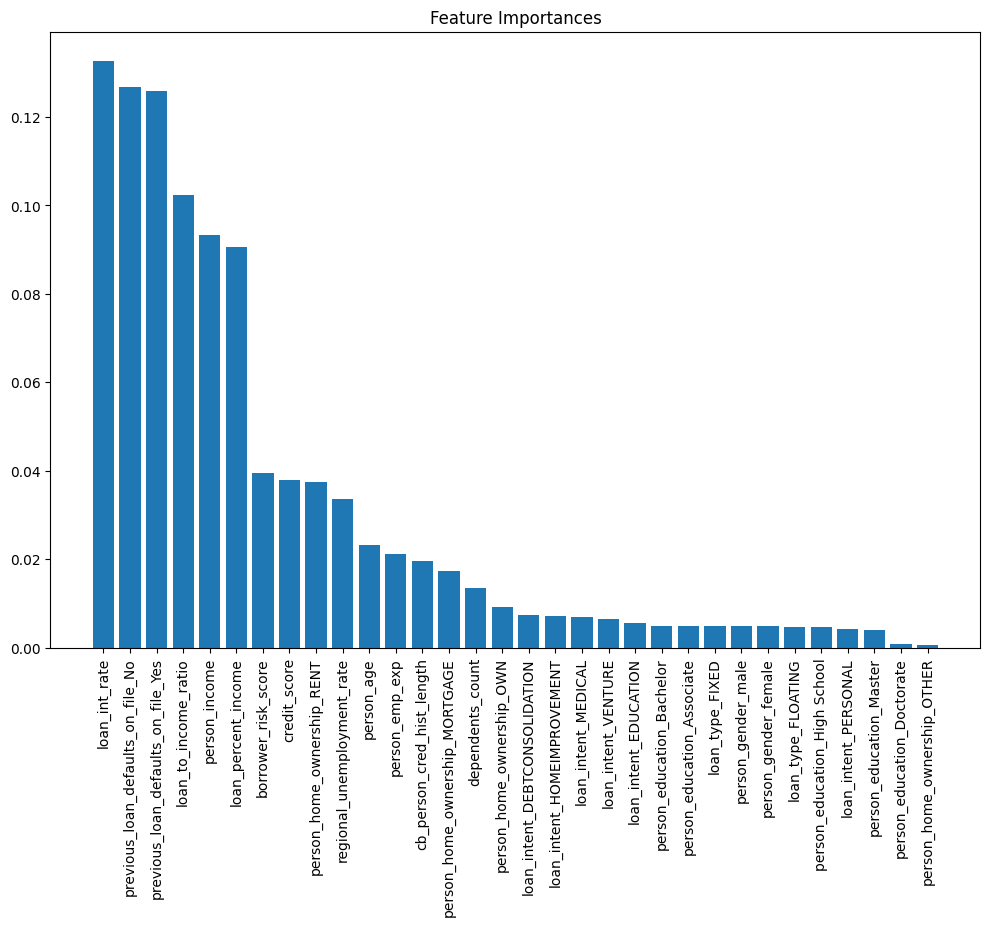

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from Random Forest
rf_model = pipeline.named_steps["classifier"]
feature_names = (
    list(numerical_features) + list(pipeline.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_features))
)
importances = rf_model.feature_importances_

# Plot feature importances
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.show()


The dataset contained 45,000 rows and 19 columns, with no missing values. The features included a combination of numerical and categorical variables that described borrower demographics, financial attributes, and loan characteristics. Initial exploration revealed that some variables, such as credit_score and loan_int_rate, were likely to be significant predictors of loan default.

To prepare the data for modeling, numerical features were standardized using StandardScaler to ensure all variables were on a similar scale. Categorical variables, such as loan_intent and person_home_ownership, were encoded using OneHotEncoder to transform them into a numerical format suitable for machine learning. These preprocessing steps were integrated into a ColumnTransformer to streamline the workflow and ensure consistent handling of the data during training and testing.

A Random Forest Classifier was selected as the predictive model due to its versatility and ability to handle both numerical and categorical variables without requiring extensive preprocessing. The dataset was split into training and testing sets, with 80% of the data used for training and 20% for evaluation. The model was incorporated into a Pipeline alongside the preprocessing steps to simplify the process and reduce the risk of data leakage.

The model achieved an accuracy of 92.5% on the test dataset, demonstrating strong overall performance. The classification report highlighted high precision and recall for the majority class (non-default loans), but recall for the minority class (default loans) was relatively lower, indicating a challenge in identifying loan defaults. The confusion matrix revealed that some false negatives occurred, where defaulting loans were misclassified as non-defaults.

Feature importance analysis was conducted using the trained Random Forest model. Variables such as credit_score, loan_int_rate, and person_income were identified as the most significant predictors of loan default.